In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import analyze
import raybay

In [140]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [129]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,"[0,1560]",18.52,NaN,1
1,Bronchus,MaxDose,"[0,3480]",0.00,NaN,1
2,Chestwall_L,MaxDvh,"[0,3000]",2.04,NaN,1
3,D2cm,MaxDose,"[0,2400]",0.00,NaN,1
4,Esophagus,MaxDvh,"[0,1880]",16.91,NaN,1
5,Esophagus,MaxDose,"[0,3000]",0.00,NaN,1
6,GreatVes,MaxDvh,"[0,4300]",5.66,NaN,1
7,GreatVes,MaxDose,"[0,4900]",0.00,NaN,1
8,Heart,MaxDvh,"[0,2800]",1.84,NaN,1
9,Heart,MaxDose,"[0,3400]",0.00,NaN,1


Text(0, 0.5, 'Objective Value')

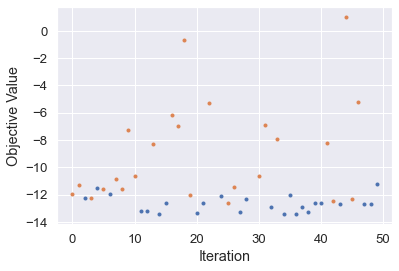

In [64]:
idx0 = (np.array(result.flag_list)==0).nonzero()[0]
idx1 = (np.array(result.flag_list)==1).nonzero()[0]
idx2 = (np.array(result.flag_list)==2).nonzero()[0]
plt.plot(idx0, result.opt_result.func_vals[idx0], '.')
plt.plot(idx1, result.opt_result.func_vals[idx1], '.')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


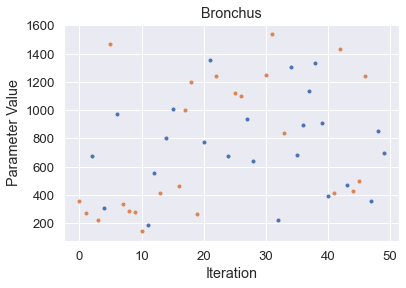

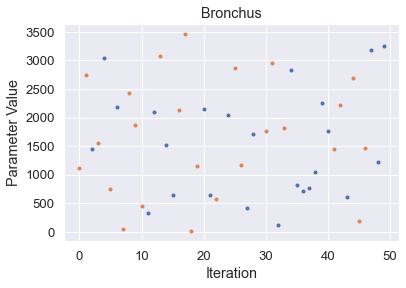

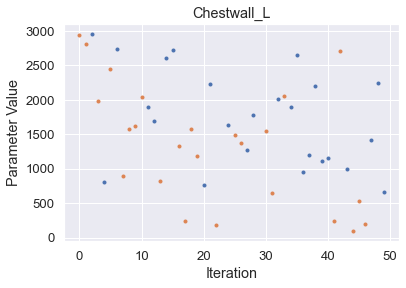

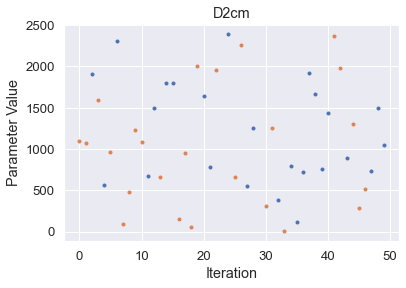

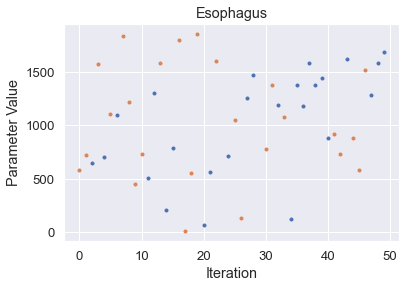

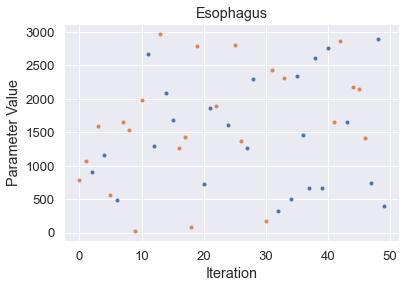

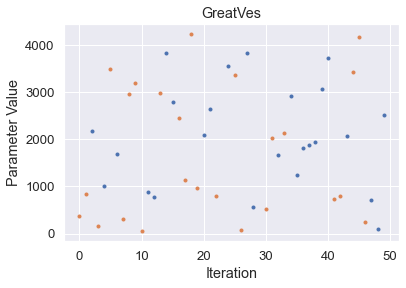

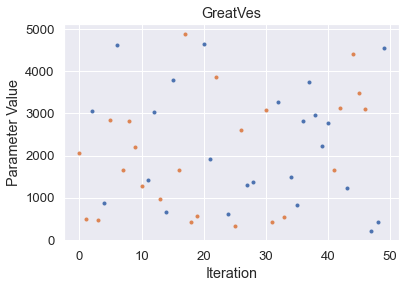

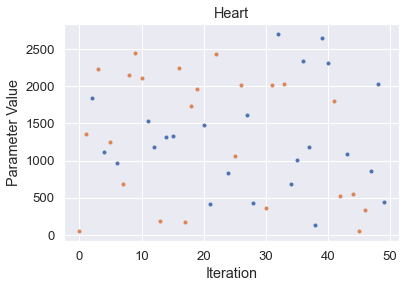

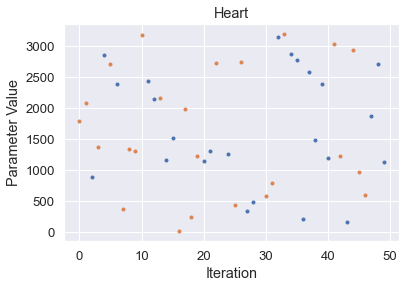

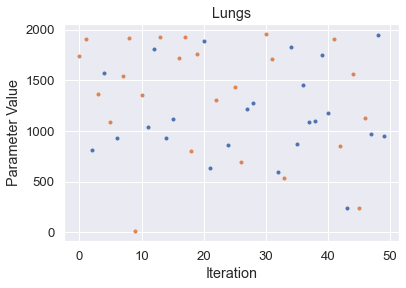

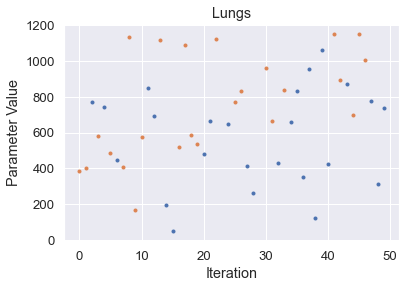

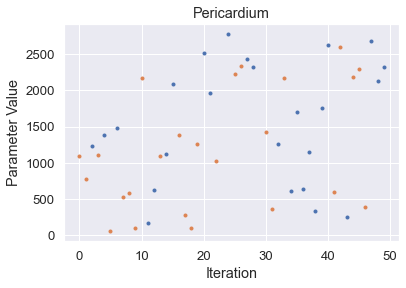

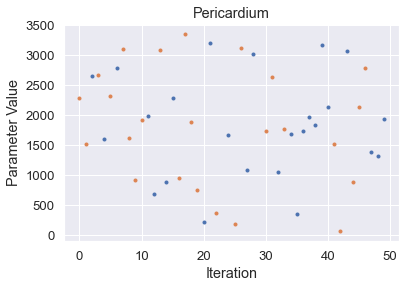

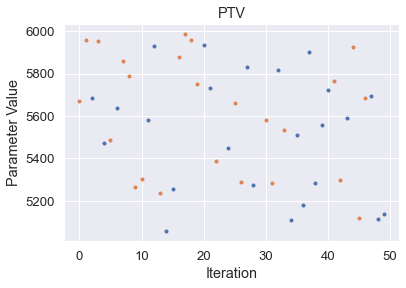

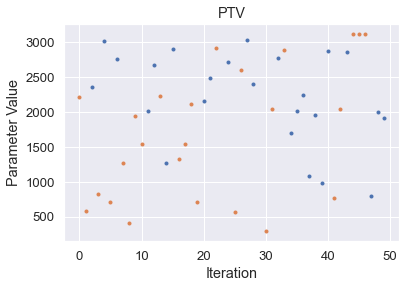

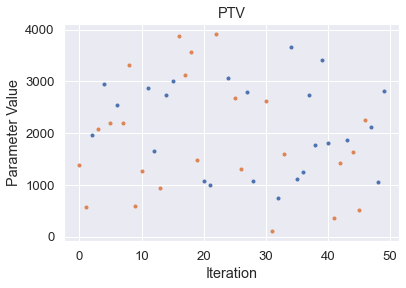

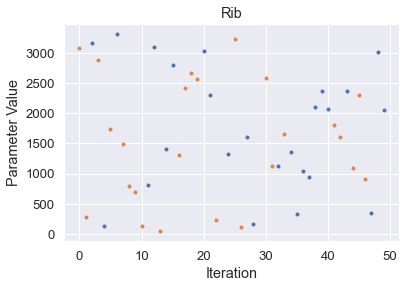

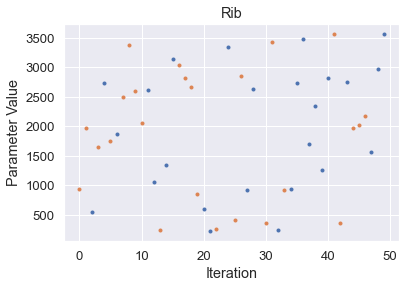

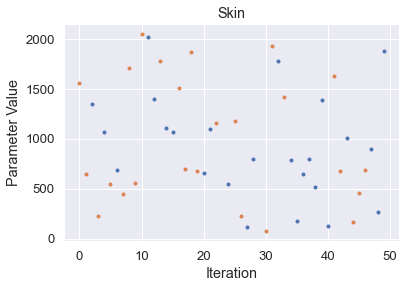

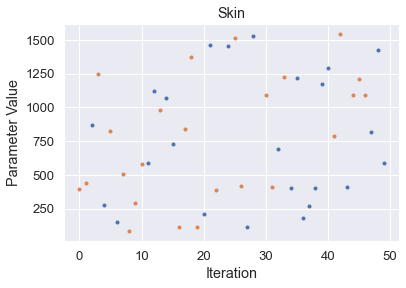

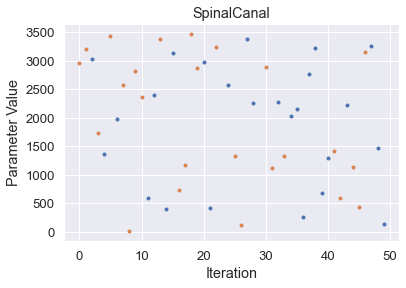

In [121]:
x_iters = [[row[ii] for row in result.opt_result.x_iters] for ii in range(len(result.opt_result.x_iters[0]))]
count = 0
for row in x_iters:
    plt.figure()
    plt.plot(idx0, np.array(row)[idx0], '.')
    plt.plot(idx1, np.array(row)[idx1], '.')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.title(result.goal_df.iloc[count]['Roi'])
    count += 1

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


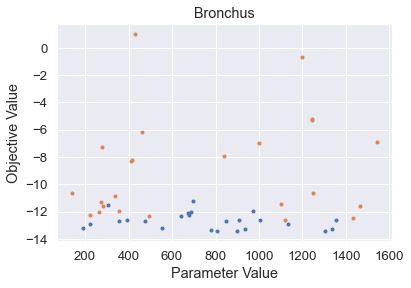

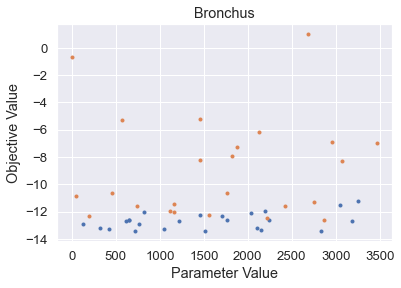

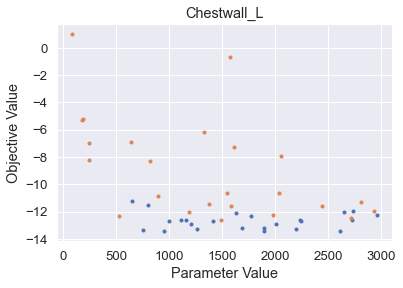

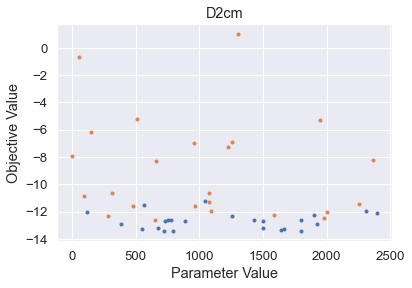

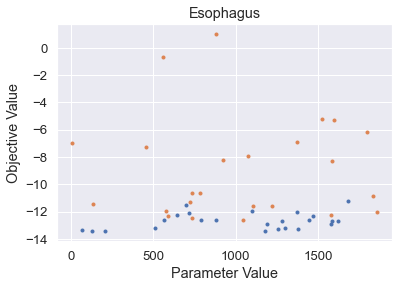

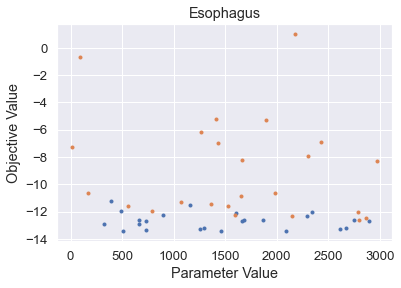

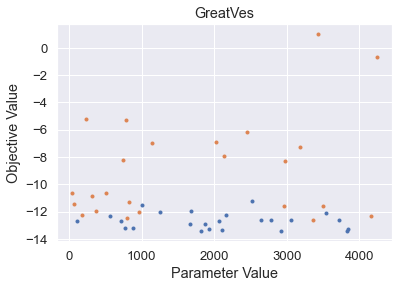

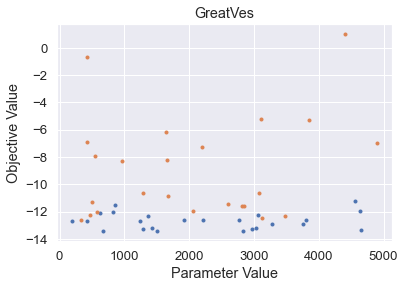

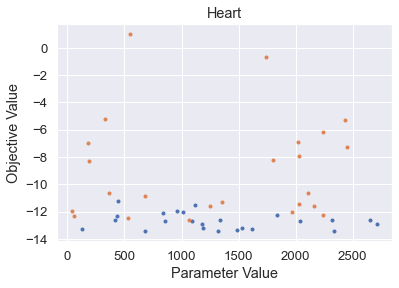

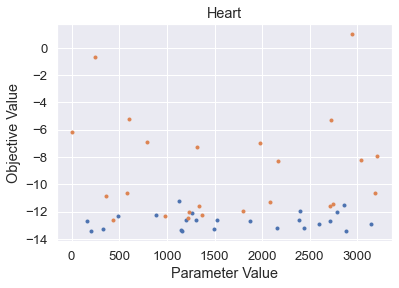

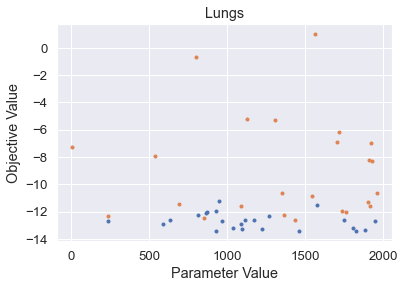

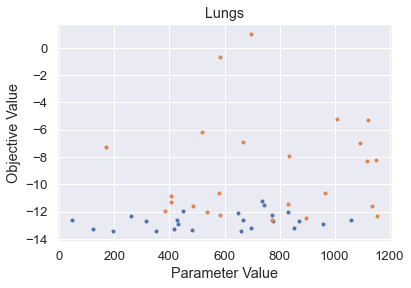

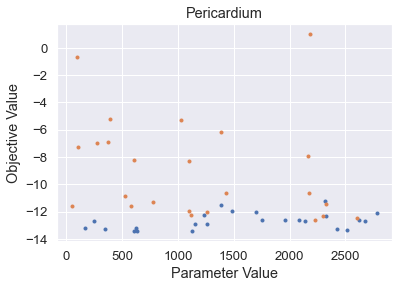

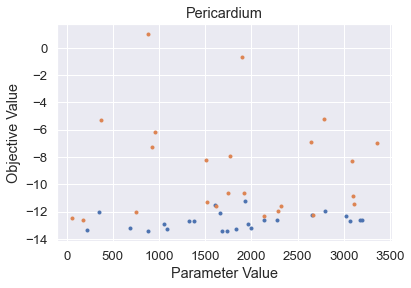

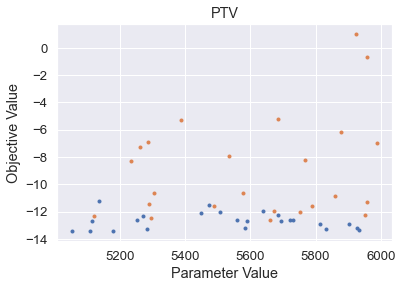

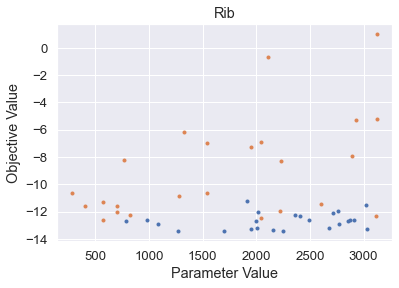

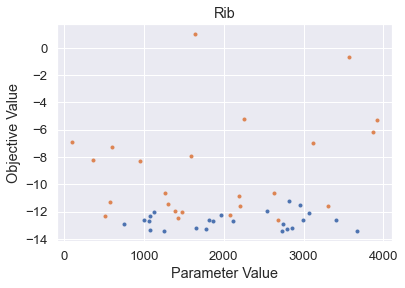

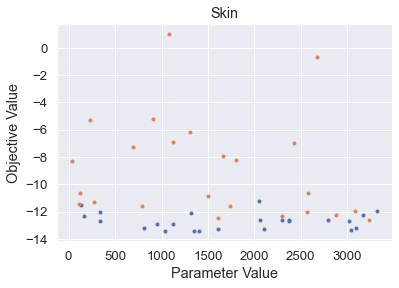

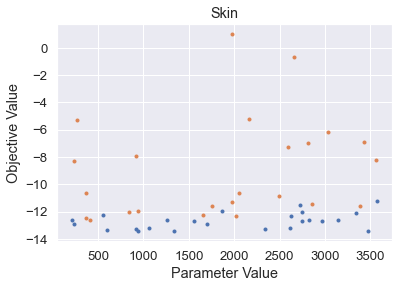

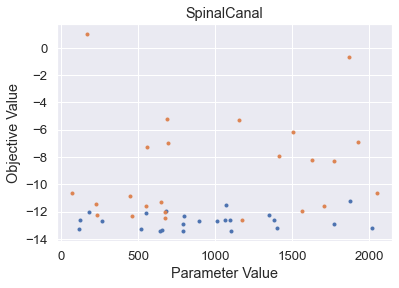

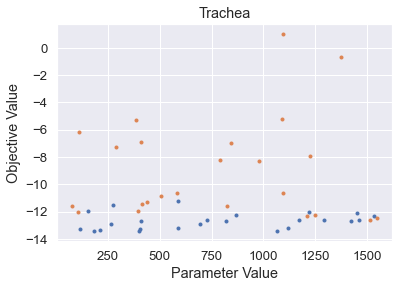

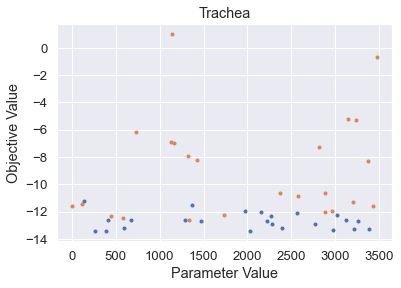

In [74]:
par_df = analyze.get_pars(result.func_df)
count = 0
for row in x_iters:
    plt.figure()v
    plt.plot(np.array(row)[idx0], np.array(result.opt_result.func_vals)[idx0], '.')
    plt.plot(np.array(row)[idx1], np.array(result.opt_result.func_vals)[idx1], '.')
    plt.xlabel('Parameter Value')
    plt.ylabel('Objective Value')
    plt.title(par_df.iloc[count]['Roi'])
    count += 1

In [141]:
#goal_dict = {term: [] for term in par_df['Term']}
goal_dict = {ii: [] for ii in range(len(result.goal_df))}
count = 0
for flag in result.flag_list:
    for goal in goal_dict:
        if flag == 2:
            goal_dict[goal].append(0)
        else:
            goal_dict[goal].append(result.goal_dict[goal][count])
    if flag != 2:
        count += 1

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


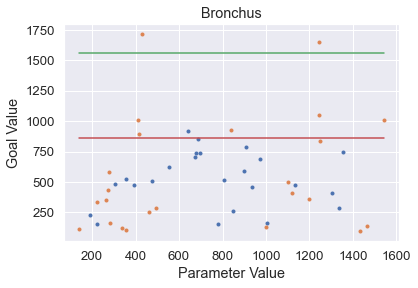

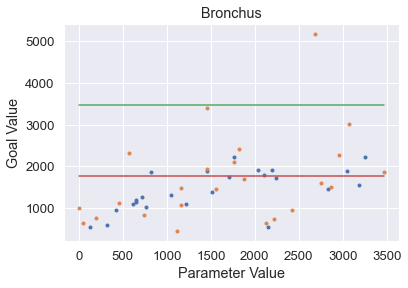

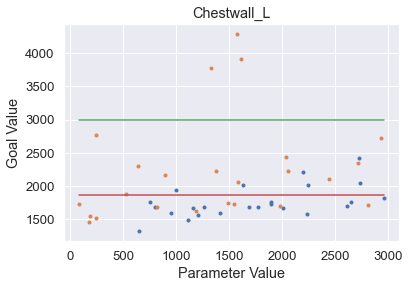

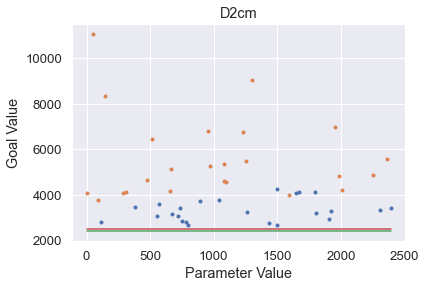

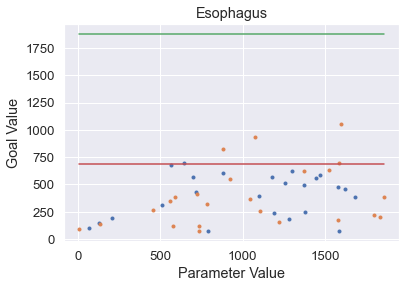

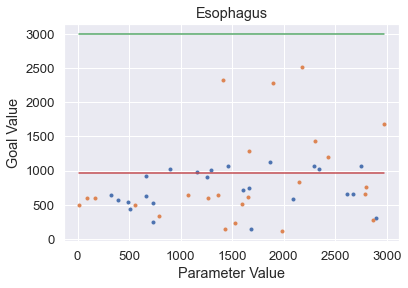

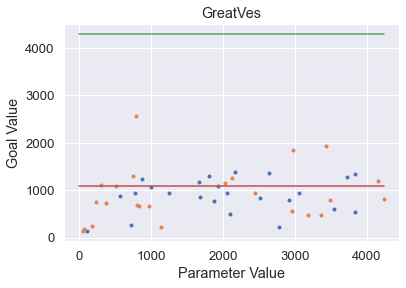

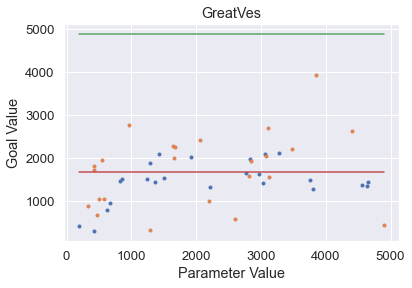

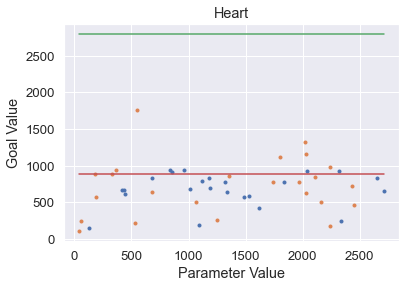

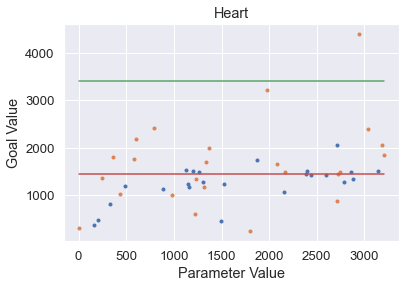

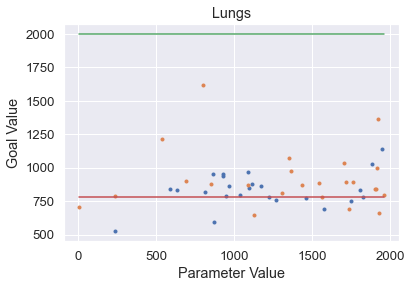

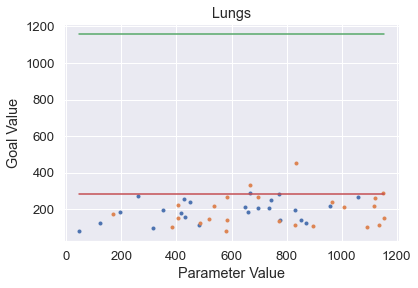

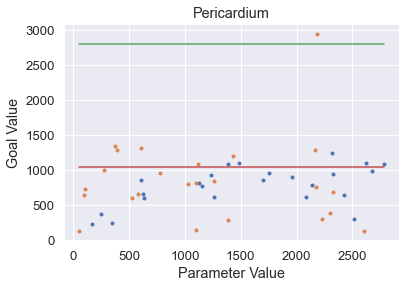

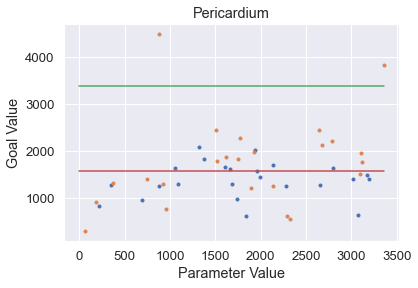

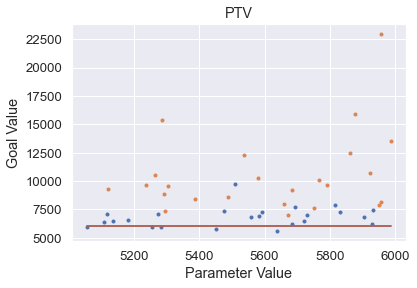

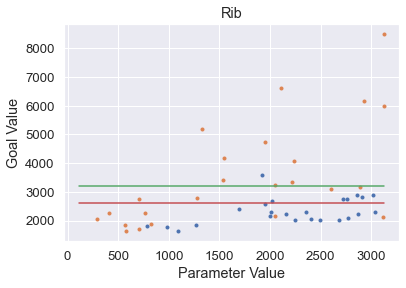

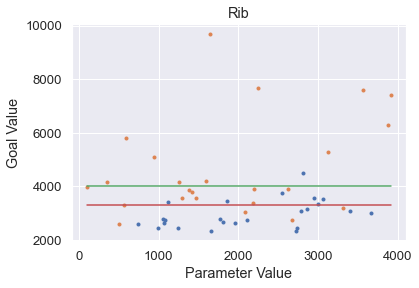

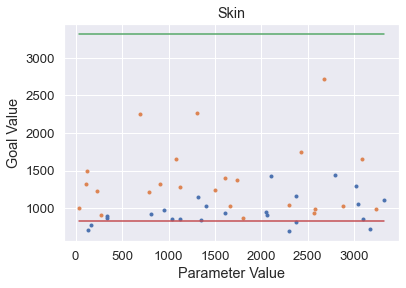

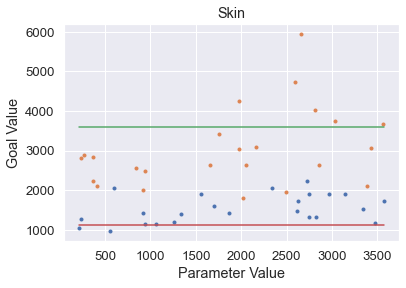

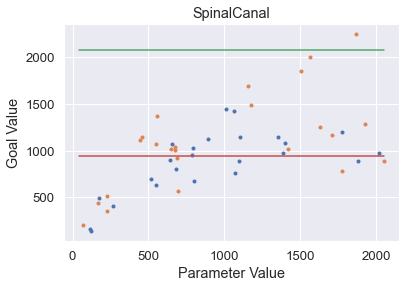

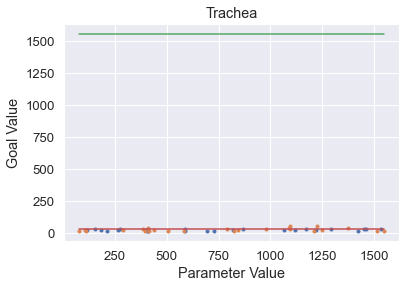

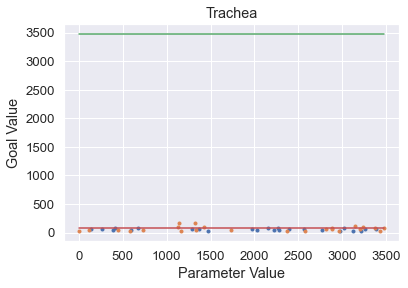

In [123]:
approved = np.load('../approved/result', allow_pickle=True)
for idx, row in par_df.iterrows():
    plt.figure()
    temp = np.array(x_iters)[idx]
    level = result.goal_df.iloc[row['Term']]['AcceptanceLevel']
    app = approved.goal_dict[row['Term']][0]
    plt.plot(temp[idx0], np.array(goal_dict[row['Term']])[idx0], '.')
    plt.plot(temp[idx1], np.array(goal_dict[row['Term']])[idx1], '.')
    plt.plot([np.min(temp), np.max(temp)], [level, level])
    plt.plot([np.min(temp), np.max(temp)], [app, app])
    plt.xlabel('Parameter Value')
    plt.ylabel('Goal Value')
    plt.title(row['Roi'])

In [124]:
# Difficult: 
# - D2cm MaxDose
# - PTV MaxDose
# - Rib?

# Pattern: SpinalCanal

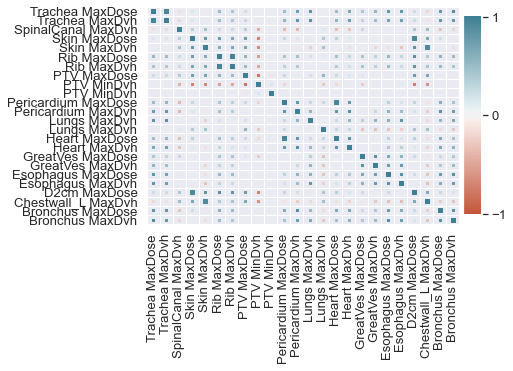

In [125]:
result.corrplot(size=10)

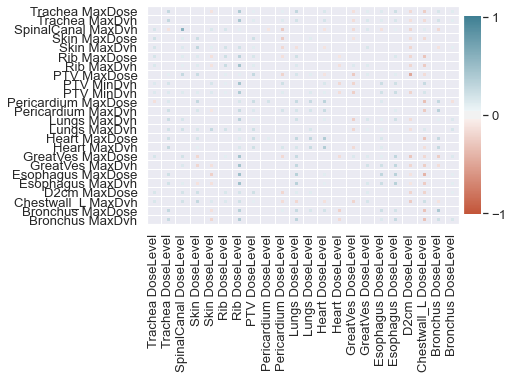

In [144]:
result.goal_dict = goal_dict
result.corrplot('pars', size=10)

In [145]:
# This doesn't look like it helped anything in terms of understanding... 
# too many parameters, and too wide a range to find any useful patterns (except SpinalCord?)

# Focus on which goals from the default that I want to improve upon
# Figure out which objectives to include and what range (do I only tune some, or only include some?)
# Do some sampling with and without those parameters?
# Look back on when I chose the goals < 50% change... what patterns did I see there? (ignore func val, just goals)
# How do I change my objective? Cluster different groups in terms of goals? 
# Figure out which parameters influence which goals? Combination of parameters?